In [47]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('../Data_Project/전체 데이터.xlsx')

madeby = ['BMW', 'GM', 'MINI', '기아', '닛산',
                      '르노삼성', '르노코리아자동차(주)', '벤츠', '볼보', '아우디',
                      '테슬라코리아 유한회사', '토요타', '포드', '포르쉐', '폭스바겐',
                      '현대', '혼다']

## 제조사 다양성 구분
df = df[df['제조사'].isin(madeby)]

## 전기차로만 구분
df = df[df['유종']=='전기']

## 평균주행거리 15000키로로 통일
df['평균주행거리'] = 15000

## 전기차 기준 비용 0원들
df['엔진오일 교체비용'] = 0
df['구동배터리 교체비용'] = 0
df['요소수'] = 0


## 일단 결측치 값 0으로 통일시키기
df['세금'] = 0
df['보험료(26세 이상)'] = 0
df['5년 배터리 교체비용'] = 0
df['타이어 교체비용'] = 0
df['브레이크오일 교체비용'] = 0
df['보조배터리 교체비용'] = 0

df = df.drop(['전비/연비'], axis = 1)

df = df[~df['모델명'].str.contains('포터|트럭', case=False, na=False)]

In [48]:
size_map = {
    # 현대/기아/제네시스 계열
    '아이오닉 5': '중형',
    '아이오닉5': '중형',
    '아이오닉 6': '중형',
    '아이오닉6': '중형',
    'EV3': '소형',
    'EV5': '중형',
    'EV6': '중형',
    'EV9': '대형',
    '코나': '소형',
    '코나 일렉트릭': '소형',
    '니로': '소형',
    '니로 EV': '소형',
    '쏘울': '소형',
    '쏘울 EV': '소형',
    'GV60': '중형',
    'GV70': '중형',
    '전동화 GV70': '중형',
    'GV80': '대형',
    '전동화 GV80': '대형',

    # BMW
    'BMW i3': '소형',
    '120Ah': '소형',
    '94Ah': '소형',
    'i4': '중형',
    'i5': '중형',
    'i7': '대형',
    'iX1': '소형',
    'iX2': '소형',
    'iX3': '중형',
    'iX': '대형',  # iX (iX / iX50 등은 대형 SUV급)

    # Benz (EQ 시리즈)
    'EQA': '소형',
    'EQB': '중형',
    'EQC': '중형',
    'EQE': '중형',
    'EQS': '대형',

    # Audi
    'Q4 e-tron': '중형',
    'Q8 e-tron': '대형',
    'e-tron': '중형',   # 일반 e-tron은 중형 SUV로 많이 분류

    # Tesla
    'Model 3': '중형',
    '모델 3': '중형',
    'Model Y': '중형',
    '모델 Y': '중형',
    'Model S': '대형',
    '모델 S': '대형',
    'Model X': '대형',
    '모델 X': '대형',

    # Polestar
    'Polestar 2': '중형',
    '폴스타 2': '중형',
    '폴스타2': '중형',

    # Nissan / VW
    'LEAF': '소형',
    '리프': '소형',
    'ID.3': '소형',
    'ID.4': '중형',
    'ID.5': '중형',

    # Porsche
    'Taycan': '대형',
    '타이칸': '대형',

    # Ford
    'Mach-E': '중형',
    'Mustang Mach-E': '중형',
    '마하-E': '중형',
}

def classify_size(model_name: str) -> str:
    m = str(model_name)
    for key, seg in size_map.items():
        if key.lower() in m.lower():
            return seg
    # 못 매칭된 모델은 일단 '중형'으로 기본 처리 (분석용 일관성 유지)
    return '중형'

# 3. 새 열 추가
df['소중대/형'] = df['모델명'].apply(classify_size)
df = df.drop(['변속형식'], axis = 1)
df = df.drop(['5년 배터리 교체비용'], axis = 1)
df = df.drop(['보조배터리 교체비용'], axis = 1)

In [49]:
## 전기차 세금 100,000원 + 30,000원(교육세)
df['세금'] = 130000

## 전기차 타이어 교체비용
df.loc[df['소중대/형'] == '소형', '타이어 교체비용'] = 400000 * 2
df.loc[df['소중대/형'] == '중형', '타이어 교체비용'] = 700000 * 2
df.loc[df['소중대/형'] == '대형', '타이어 교체비용'] = 1300000 * 2


In [50]:
## 

# 2019년
df.loc[(df['년도']==2019) & (df['소중대/형']=='소형'), '보험료(26세 이상)'] = 1460000 * 1.26
df.loc[(df['년도']==2019) & (df['소중대/형']=='중형'), '보험료(26세 이상)'] = 1720000 * 1.26
df.loc[(df['년도']==2019) & (df['소중대/형']=='대형'), '보험료(26세 이상)'] = 2100000 * 1.26

# 2020년
df.loc[(df['년도']==2020) & (df['소중대/형']=='소형'), '보험료(26세 이상)'] = 1420000 * 1.26
df.loc[(df['년도']==2020) & (df['소중대/형']=='중형'), '보험료(26세 이상)'] = 1680000 * 1.26
df.loc[(df['년도']==2020) & (df['소중대/형']=='대형'), '보험료(26세 이상)'] = 2050000 * 1.26

# 2021년
df.loc[(df['년도']==2021) & (df['소중대/형']=='소형'), '보험료(26세 이상)'] = 1350000 * 1.26
df.loc[(df['년도']==2021) & (df['소중대/형']=='중형'), '보험료(26세 이상)'] = 1600000 * 1.26
df.loc[(df['년도']==2021) & (df['소중대/형']=='대형'), '보험료(26세 이상)'] = 1950000 * 1.26

# 2022년
df.loc[(df['년도']==2022) & (df['소중대/형']=='소형'), '보험료(26세 이상)'] = 1200000 * 1.26
df.loc[(df['년도']==2022) & (df['소중대/형']=='중형'), '보험료(26세 이상)'] = 1450000 * 1.26
df.loc[(df['년도']==2022) & (df['소중대/형']=='대형'), '보험료(26세 이상)'] = 1850000 * 1.26

# 2023년
df.loc[(df['년도']==2023) & (df['소중대/형']=='소형'), '보험료(26세 이상)'] = 1120000 * 1.26
df.loc[(df['년도']==2023) & (df['소중대/형']=='중형'), '보험료(26세 이상)'] = 1350000 * 1.26
df.loc[(df['년도']==2023) & (df['소중대/형']=='대형'), '보험료(26세 이상)'] = 1700000 * 1.26

# 2024년
df.loc[(df['년도']==2024) & (df['소중대/형']=='소형'), '보험료(26세 이상)'] = 1050000 * 1.26
df.loc[(df['년도']==2024) & (df['소중대/형']=='중형'), '보험료(26세 이상)'] = 1300000 * 1.26
df.loc[(df['년도']==2024) & (df['소중대/형']=='대형'), '보험료(26세 이상)'] = 1650000 * 1.26

In [51]:
## 전기차 구동배터리 교체비용
df.loc[df['소중대/형'] == '소형', '구동배터리 교체비용'] = 30000000
df.loc[df['소중대/형'] == '중형', '구동배터리 교체비용'] = 40000000
df.loc[df['소중대/형'] == '대형', '구동배터리 교체비용'] = 50000000

In [52]:
## 출력 순서 정리
df = df.reset_index(drop=True)
df['순번'] = df.index + 1

In [53]:
## 전기차 에너지 단가 계산 (평균 구하기)

data_elec = {
    'No': [i for i in range(1, 35)],
    '충전사업자': [
        '(주)이앤에이치에너지', 'GS차지비', 'KEVIT', 'LG유플러스 볼트업', 'NICE인프라(주)',
        'SG생활안전', 'SK일렉링크', '레드이엔지', '블루네트웍스', '서울씨엔지',
        '스타코프', '신세계아이앤씨', '씨어스', '아이마켓코리아', '에버온',
        '이브이시스', '이엘일렉트릭', '이지차저', '이카플러그', '제주전기자동차서비스',
        '차지인', '채비', '클린일렉스', '타디스테크놀로지', '테슬라', '파워큐브코리아',
        '펌프킨', '플러그링크', '한국전기차충전서비스', '한국전력공사', '한화솔루션',
        '현대엔지니어링', '환경부', '휴맥스이브이'
    ],
    '회원여부': ['회원'] * 34,
    '평균요금(원)': [
        307.5, 293.4, 306.3, 322.5, 330.3, 335.5, 364.4, 330, 335.5, 312.5,
        260, 294, 336, 282, 316, 335, 286.7, 314.3, 335.5, 300, 302, 347.5,
        275.5, 307.7, 339, 319.5, 335.5, 295, 348, 335.5, 289, 318.5, 335.5, 310
    ]
}

# DataFrame 생성
df_elec = pd.DataFrame(data_elec)

# 전체 평균 요금 계산
average_price = df_elec['평균요금(원)'].mean()

In [54]:
## 전기차 에너지 단가 년도별로 구분 짓기
df.loc[df['년도'] == 2019, '에너지단가(원/kWh)'] = average_price * 0.50
df.loc[df['년도'] == 2020, '에너지단가(원/kWh)'] = average_price * 0.60
df.loc[df['년도'] == 2021, '에너지단가(원/kWh)'] = average_price * 0.80
df.loc[df['년도'] == 2022, '에너지단가(원/kWh)'] = average_price * 0.95
df.loc[df['년도'] == 2023, '에너지단가(원/kWh)'] = average_price * 1.00
df.loc[df['년도'] == 2024, '에너지단가(원/kWh)'] = average_price * 1.00

In [55]:
## 1년 유지비 계산을 위한 타이어, 구동배터리 비용 나누기 5
df['타이어 교체비용'] = df['타이어 교체비용'] / 5
df['구동배터리 교체비용'] = df['구동배터리 교체비용'] / 5

In [56]:
## 1년 유지비 계산 열 추가하기
df['1년 유지비(원)'] = ((df['평균주행거리']/df['복합연비'])*df['에너지단가(원/kWh)'])+df['세금'] + df['보험료(26세 이상)']+df['타이어 교체비용']+df['엔진오일 교체비용']+df['브레이크오일 교체비용']
df['1년 유지비(원)'] = df['1년 유지비(원)'].astype(int)

In [57]:
## 데이터 타입 알맞게 변환해주기
df['년도'] = df['년도'].astype(int)
df['배기량'] = df['배기량'].astype(float)
df['복합연비'] = df['복합연비'].astype(float)
df['CO2배출량'] = df['CO2배출량'].astype(float)

In [64]:
df = df.drop(['순번'], axis = 1)
df
#df.to_excel('전기차_데이터완성.xlsx')

,년도,모델명,제조사,유종,배기량,복합연비,등급,CO2배출량,소중대/형,평균주행거리,세금,보험료(26세 이상),타이어 교체비용,엔진오일 교체비용,브레이크오일 교체비용,구동배터리 교체비용,요소수,에너지단가(원/kWh),1년 유지비(원)
0,2019,BMW i3 120Ah,BMW,전기,0.0,5.600,고속,0.0,소형,15000,130000,1839600,160000.0,0,0,6000000.0,0,158.170588,2553271
1,2023,BMW i3 120Ah,BMW,전기,0.0,5.600,2등급,0.0,소형,15000,130000,1411200,160000.0,0,0,6000000.0,0,316.341176,2548542
2,2020,BMW i3 120Ah,BMW,전기,0.0,5.600,고속,0.0,소형,15000,130000,1789200,160000.0,0,0,6000000.0,0,189.804706,2587605
3,2021,BMW i3 120Ah,BMW,전기,0.0,5.600,고속(전기),0.0,소형,15000,130000,1701000,160000.0,0,0,6000000.0,0,253.072941,2668873
4,2022,BMW i3 120Ah,BMW,전기,0.0,5.600,고속,0.0,소형,15000,130000,1512000,160000.0,0,0,6000000.0,0,300.524118,2606975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,2024,타이칸 터보 S,포르쉐,전기,0.0,2.845,5등급,0.0,대형,15000,130000,2079000,520000.0,0,0,10000000.0,0,316.341176,4396879
710,2021,타이칸 터보 S (5인승),포르쉐,전기,0.0,2.800,고속(전기),0.0,대형,15000,130000,2457000,520000.0,0,0,10000000.0,0,253.072941,4462747
711,2022,타이칸 터보 S (5인승),포르쉐,전기,0.0,2.800,고속,0.0,대형,15000,130000,2331000,520000.0,0,0,10000000.0,0,300.524118,4590950
712,2023,타이칸 터보 S (5인승),포르쉐,전기,0.0,2.800,5등급,0.0,대형,15000,130000,2142000,520000.0,0,0,10000000.0,0,316.341176,4486684


In [59]:
# 년도, CO2배출량만 빼서 저장
df1 = df[['년도','CO2배출량']]
display(df1)
df1.to_excel("년도+배출량.xlsx")

,년도,CO2배출량
0,2019,0.0
1,2023,0.0
2,2020,0.0
3,2021,0.0
4,2022,0.0
...,...,...
709,2024,0.0
710,2021,0.0
711,2022,0.0
712,2023,0.0


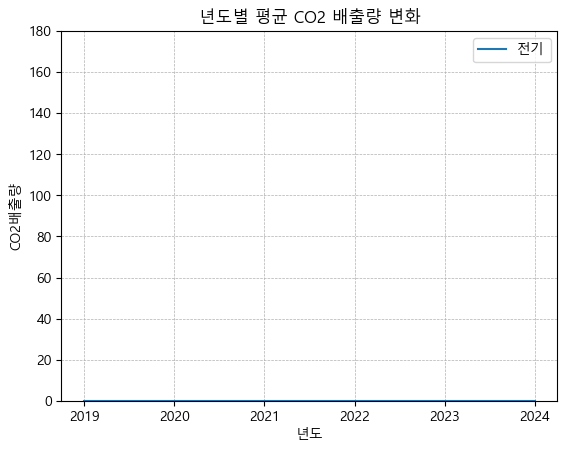

In [60]:
# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

df1 = df.groupby('년도')['CO2배출량'].mean()

plt.plot(df1.index, df1.values,label = '전기')
plt.xlabel('년도')
plt.ylabel('CO2배출량')
plt.title('년도별 평균 CO2 배출량 변화')
plt.ylim(0, 180)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

In [62]:
mask = df['모델명'].str.contains('BMW i5', case=False, na=False) ## 대소문자 구분 안하고 na은 False로
retDF2 = df[mask][['년도','1년 유지비(원)']]

retDF2 = retDF2[retDF2['1년 유지비(원)'] > 0]                         ## 0보다 큰 값만 남기기

ret = retDF2.groupby('년도', as_index=False)['1년 유지비(원)'].mean()  ## '년도'같은 값끼리 묶어줌. ## 인덱스는 그대로 둠
display(ret)

,년도,1년 유지비(원)
0,2023,3314030.00
1,2024,3183634.25


In [63]:
ret.to_excel('./1년유지비.xlsx')